# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 8



In this lab we will cover material from lecture 9. You will be asked questions related to the material we covered during the lecture.



This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)



This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.



You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!



If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 8' in teams. Have a nice lab!



-----------------------



Dans ce laboratoire, nous couvrirons le matériel du cours 9. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.



Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)



Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.



Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!



Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 8' en teams. Je vous souhaite un beau laboratoire!

# Q1.a Generate data from a Gaussian Mixture Model (10pt)



In this lecture we talked about the Gaussian Mixture Model's data generation process. (Week 9, Slide 17)



Use a Gaussian Mixture Model with Isotropic Covariances. Use $K=3$ clusters. For the means, use `means = torch.tensor([[1.5, -.5], [1, -1], [1, 0]]).float().transpose(0, 1)`. As the variance parameter for all clusters use $\sigma = 0.1$.



Hint: `sigma*torch.randn(1)` would generate a zero-mean Gaussian random variable with standard deviation equal to `sigma`.



Another hint: If you want to generate a unit variance Gaussian random variable with mean `mu`, you can use `mu + torch.randn(1)`



Once you are done, plot the data.



# Q1.a Générer des données à partir d'un modèle de mélange gaussien (10 pts)



Dans cette conférence, nous avons parlé du processus de génération de données du modèle de mélange gaussien. (Semaine 9, diapositive 17)



Utilisez un modèle de mélange gaussien avec des covariances isotropes. Utilisez des clusters $K=3$. Pour les moyennes, utilisez `means = torch.tensor([[1.5, -.5], [1, -1], [1, 0]]).float().transpose(0, 1)`. Comme paramètre de variance pour tous les clusters, utilisez $\sigma = 0,1$.



Indice : `sigma*torch.randn(1)` générerait une variable aléatoire gaussienne de moyenne nulle avec un écart type égal à `sigma`.



Autre astuce : si vous souhaitez générer une variable aléatoire gaussienne à variance unitaire avec une moyenne « mu », vous pouvez utiliser « mu + torch.randn(1) »



Une fois que vous avez terminé, tracez les données.


(0.6753845304250717,
 1.8770210057497025,
 -1.375295849889517,
 0.3035742215812206)

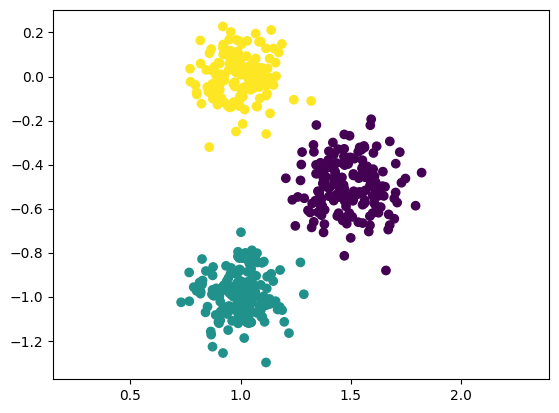

In [14]:
import sklearn.datasets as skd

import numpy as np

import matplotlib.pyplot as plt

import torch



np.random.seed(2)



# sample cluster indicators

K = 3    # number of clusters

N = 500    # number of data points

# complete below to get the cluster indicator

H = torch.randint(0,K,(N,))



eye = torch.eye(K)

one_hots = eye[:, H]

#get the means

means = torch.tensor([[1.5, -.5], [1, -1], [1, 0]]).float().transpose(0, 1)



# generate the means

X = torch.matmul(means, one_hots)



# add noise

X = X + 0.1*torch.randn(2, N)

X = X.transpose(0, 1)



# plot

plt.scatter(X[:, 0], X[:, 1], c=H)

plt.axis('equal')


# Q1.b Implement the K-means Clustering (25pt)



Implement Kmeans Clustering as described in slide 22. Plot the resulting clustering at the end of each epoch.



# Q1.b Implémenter le clustering K-means (25pt)



Implémentez le clustering Kmeans comme décrit dans la diapositive 22. Tracez le clustering résultant à la fin de chaque époque.


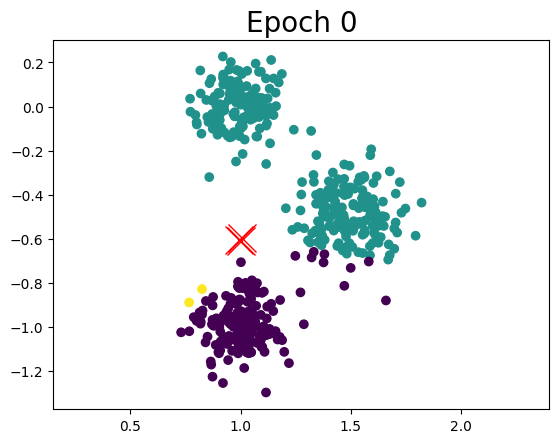

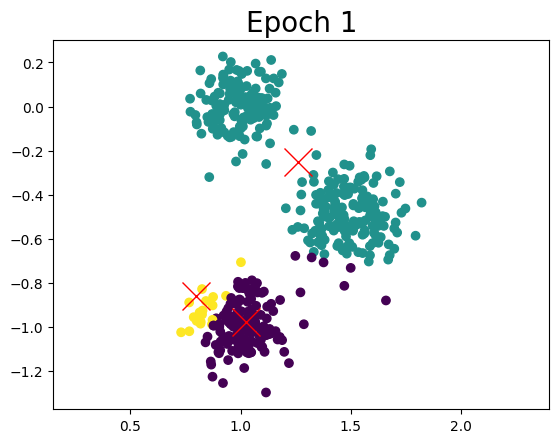

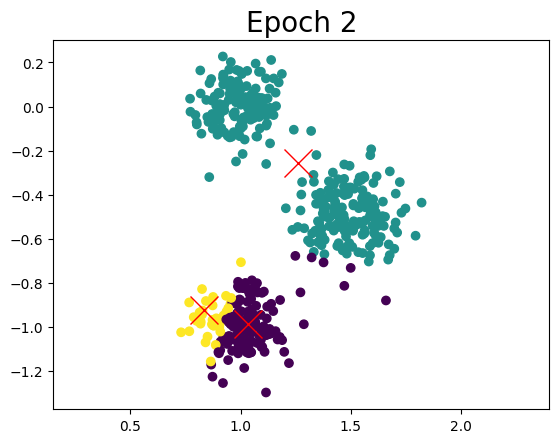

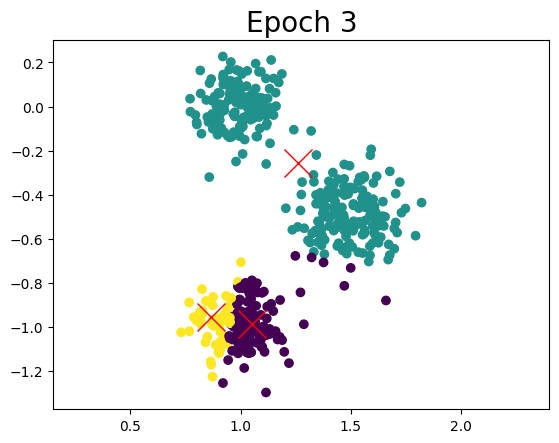

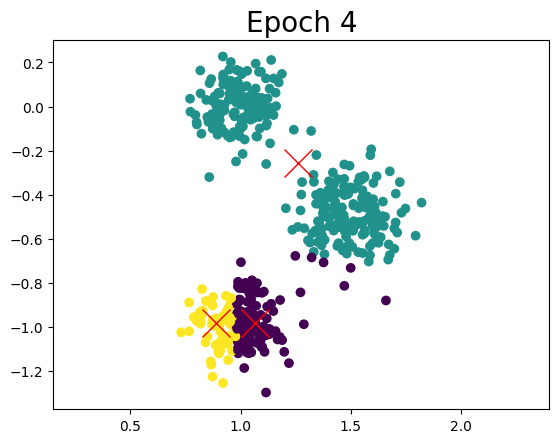

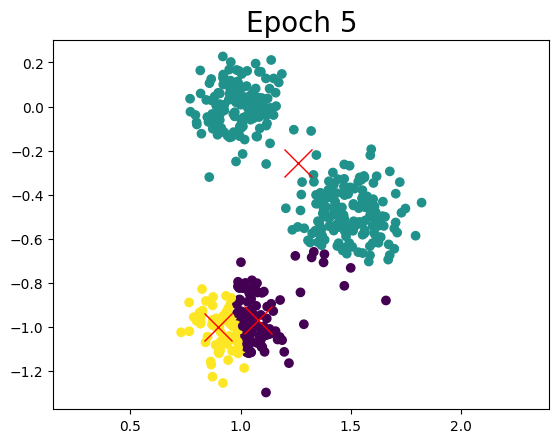

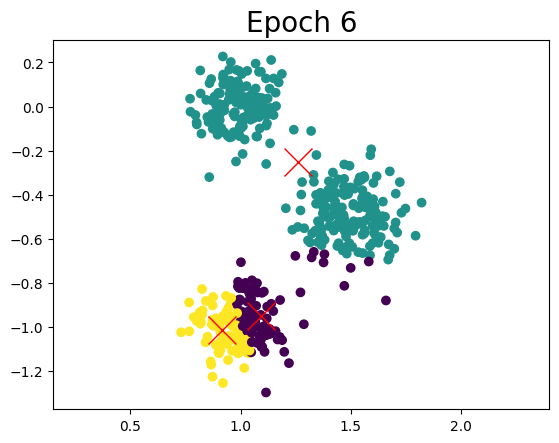

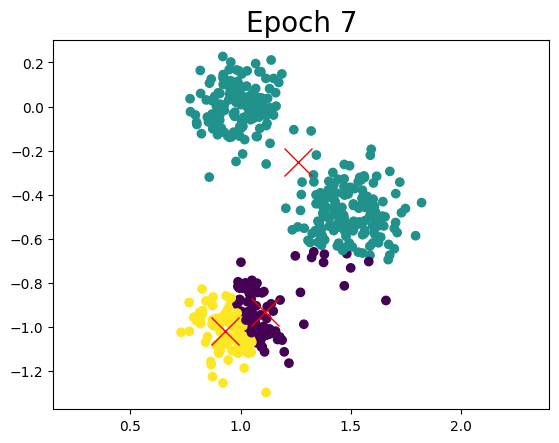

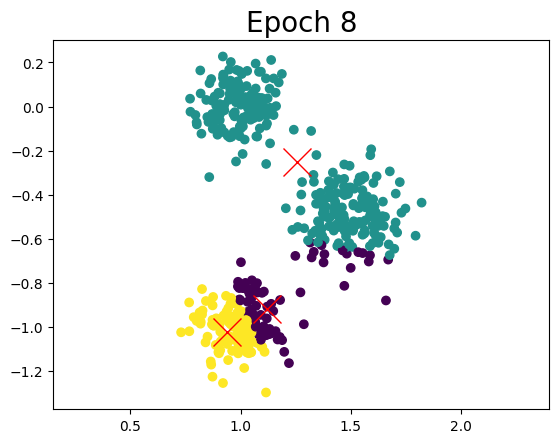

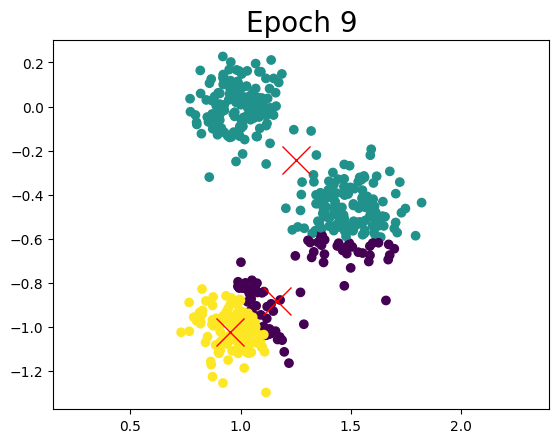

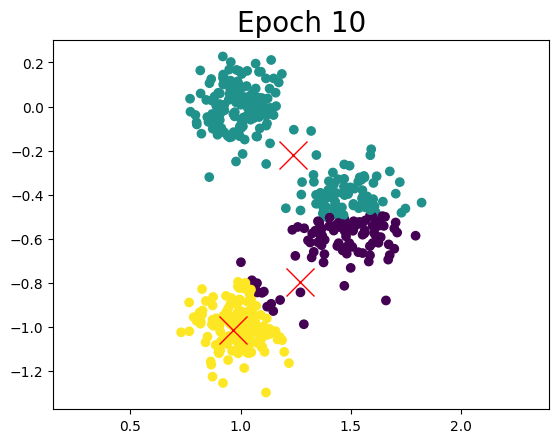

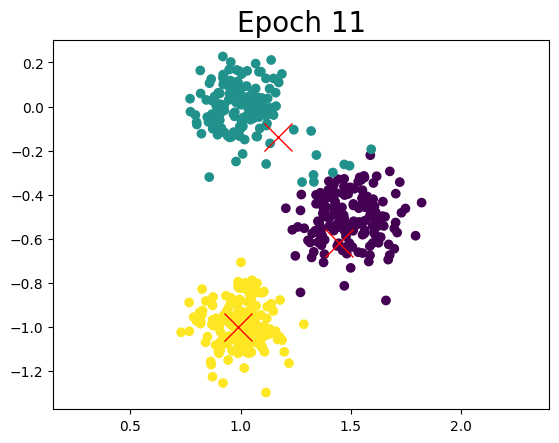

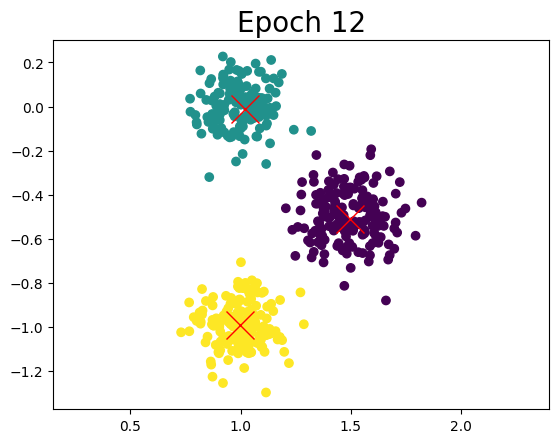

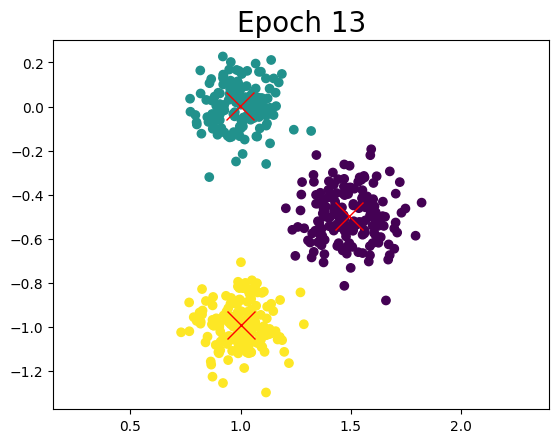

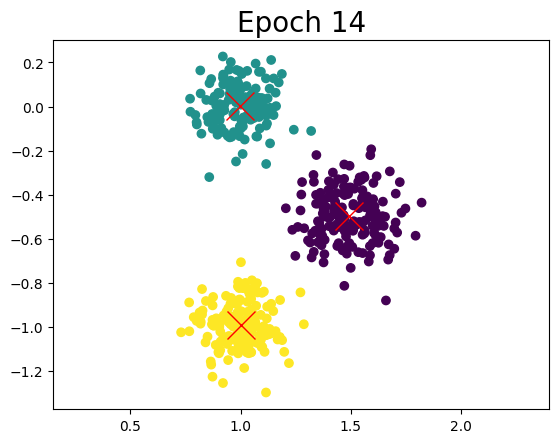

In [15]:
torch.manual_seed(8)

mus = torch.randn(K, 2) * 0.01 + torch.tensor([1, -0.6])



EP = 15

for ep in range(EP):

    # E step

    dists = torch.cdist(X, mus)

    inds = dists.argmin(1)

 

    # plotting things

    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], c=inds)

    plt.plot(mus[:, 0], mus[:, 1], 'rx', markersize=20)

    plt.axis('equal')

    plt.title('Epoch {}'.format(ep), fontsize=20)

   

    # M step

    for k in range(K):

        mus[k, :] = X[inds == k].mean(0)






# Q2. Generate Data from GMM (with Full-Covariance Gaussian components) (15pt)



Generate 2D data that follows a GMM, with Gaussian components that have a full covariance matrix. Again use $K=3$ components.



Each Gaussian component should be zero mean. Use the covariance matrices that correspond to the transforms that we define below. Use $\pi_k = 1/K$.



That is covariance of cluster $k$ should be defined such that,



$$ E[x_n x_n^\top | h_n =k] = A_k A_k^\top ,$$

so $x_n = A_{h_n} \epsilon$, where $\epsilon \sim \mathcal N (0, I)$. Use again $\pi_k = 1/K$.



Hint: Using `torch.einsum` can simplify your life here.



# Q2. Générer des données à partir de GMM (avec des composants gaussiens à covariance complète) (15 pt)



Générez des données 2D qui suivent un GMM, avec des composants gaussiens dotés d'une matrice de covariance complète. Utilisez à nouveau les composants $K=3$.



Chaque composante gaussienne doit avoir une moyenne nulle. Utilisez les matrices de covariance qui correspondent aux transformations que nous définissons ci-dessous. Utilisez $\pi_k = 1/K$.



C'est-à-dire que la covariance du cluster $k$ doit être définie de telle sorte que,



$$ E[x_n x_n^\top | h_n =k] = A_k A_k^\top ,$$

donc $x_n = A_{h_n} \epsilon$, où $\epsilon \sim \mathcal N (0, I)$. Utilisez à nouveau $\pi_k = 1/K$.



Astuce : utiliser `torch.einsum` peut vous simplifier la vie ici.


torch.Size([3, 2, 2])
torch.Size([500, 2, 2])
torch.Size([500, 2])


(-27.55102405548096,
 35.08731327056885,
 -28.181797885894774,
 23.109019184112547)

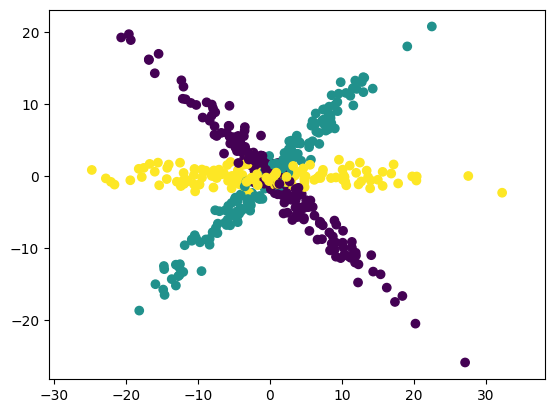

In [16]:
import torch

pi = torch.tensor(torch.pi)

def getrotmat(angle):

  return torch.tensor([[torch.cos(angle), -torch.sin(angle)], [torch.sin(angle), torch.cos(angle)]])



K = 3

N = 500

# sample the cluster indicators

H = torch.randint(0, K, (N,))



# define $A_k$

As = torch.stack([torch.matmul(torch.diag(torch.tensor([10, 1])).float(), getrotmat(-pi/4).transpose(0, 1)),

                      torch.matmul(torch.diag(torch.tensor([10, 1])).float(), getrotmat(pi/4).transpose(0, 1)),

                      torch.diag(torch.tensor([10, 1]))], dim=0)

Ahn = As[H]

print(As.shape)

print(Ahn.shape)



# transform the noises

noises = torch.randn(N, 2)

# noises = torch.matmul?torch.einsum?torch.helpme?



noises = torch.einsum('kij,ki->kj', Ahn, noises)

print(noises.shape)



X = noises



plt.scatter(X[:, 0], X[:, 1], c=H)

plt.axis('equal')








# Q2b. Implement the EM algorithm for learning a GMM (30pt)



Implement the EM algorithm for learning a GMM as described in the slide 36.



In addition to estimating the mean parameters (as described in slide 36), you should also learn the cluster covariances $\Sigma_{1:K}$, and the cluster prior assignment probabilities $\pi_{1:K}$.



So, note that,



$$ \widehat \mu_{k} = \frac{  \sum_{n=1}^N \mathbb E[h_n =k] x_n  }{\sum_{n=1}^N \mathbb E[h_n =k]},$$



$$\widehat \Sigma_{k} = \frac{  \sum_{n=1}^N \mathbb E[h_n =k] (x_n - \mu_k)(x_n - \mu_k)^\top  }{\sum_{n=1}^N \mathbb E[h_n =k]},$$

And, $$\widehat \pi_{k} = \frac{1}{N} \sum_{n=1}^N \mathbb E[h_n =k].$$



Finally, note that,



$$\mathbb E[h_n = k] =  \frac{\pi_k \mathcal N(x_n; \mu_k, \Sigma_k)}{\sum_{k'} \pi_{k'} \mathcal N(x_n; \mu_{k'}, \Sigma_{k'})}$$





#Q2b. Implémenter l'algorithme EM pour apprendre un GMM (30pt)



Implémentez l'algorithme EM pour apprendre un GMM comme décrit dans la diapositive 36.



En plus d'estimer les paramètres moyens (comme décrit dans la diapositive 36), vous devez également apprendre les covariances du cluster $\Sigma_{1:K}$ et les probabilités d'affectation préalable du cluster $\pi_{1:K}$.



Alors, notez que,



$$ \widehat \mu_{k} = \frac{ \sum_{n=1}^N \mathbb E[h_n =k] x_n }{\sum_{n=1}^N \mathbb E[h_n =k] },$$



$$\widehat \Sigma_{k} = \frac{ \sum_{n=1}^N \mathbb E[h_n =k] (x_n - \mu_k)(x_n - \mu_k)^\top }{\sum_{ n=1}^N \mathbb E[h_n =k]},$$

Et, $$\widehat \pi_{k} = \frac{1}{N} \sum_{n=1}^N \mathbb E[h_n =k].$$



Enfin, notons que,



$$\mathbb E[h_n = k] = \frac{\pi_k \mathcal N(x_n; \mu_k, \Sigma_k)}{\sum_{k'} \pi_{k'} \mathcal N(x_n; \mu_ {k'}, \Sigma_{k'})}$$




torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])
torch.Size([500, 3])


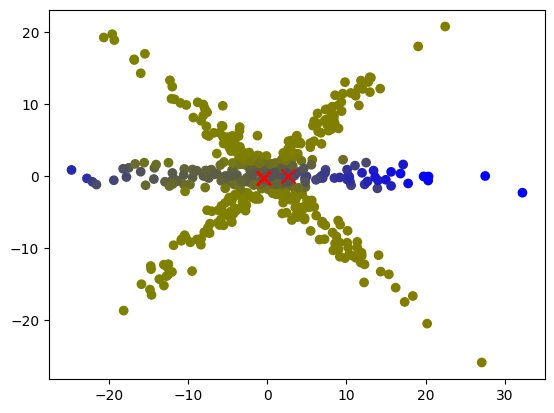

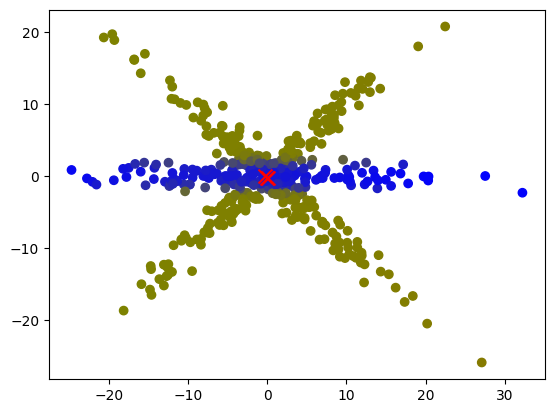

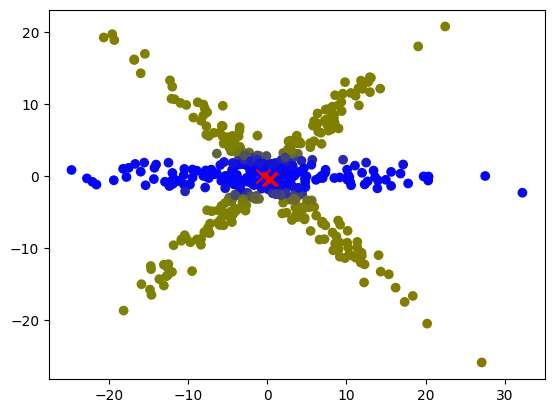

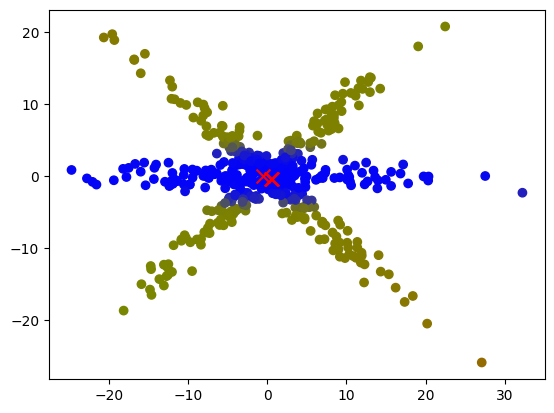

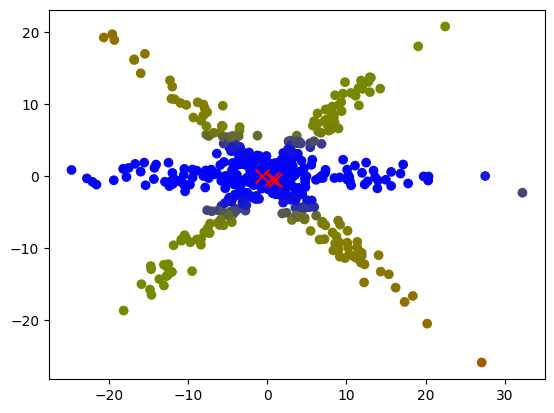

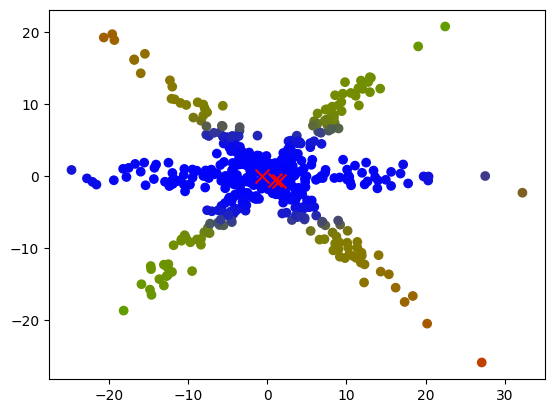

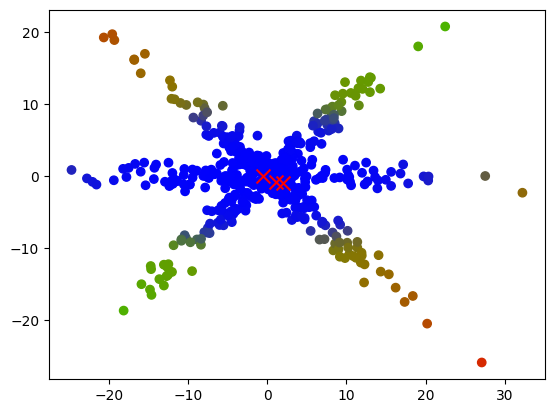

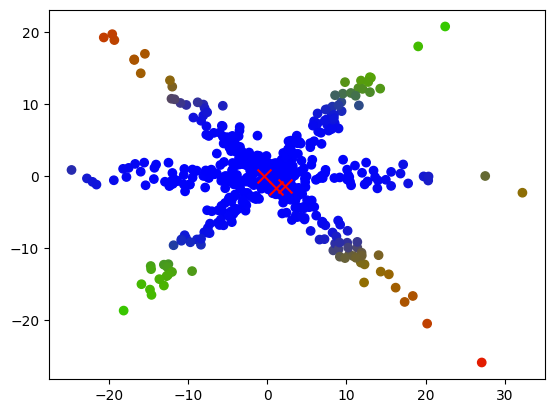

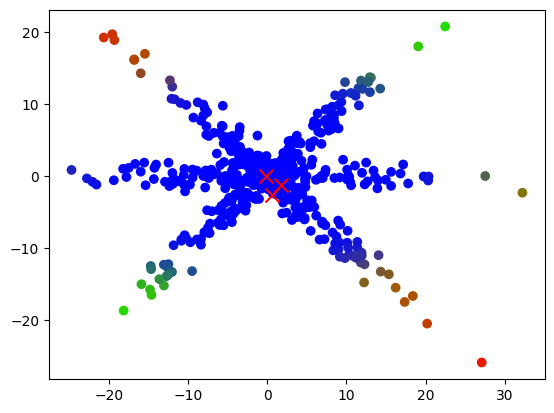

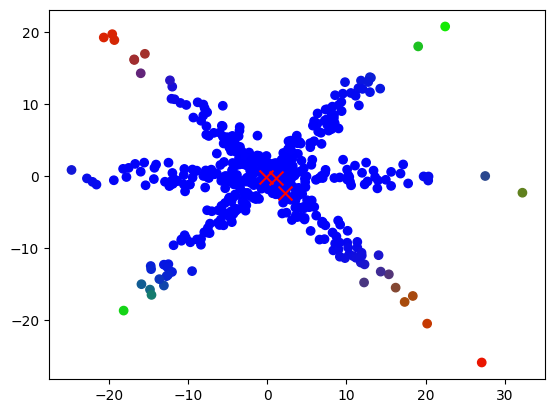

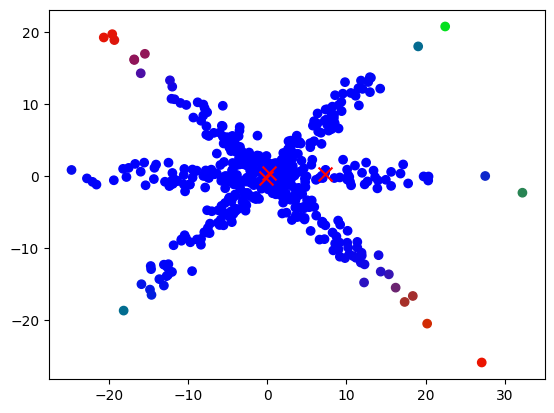

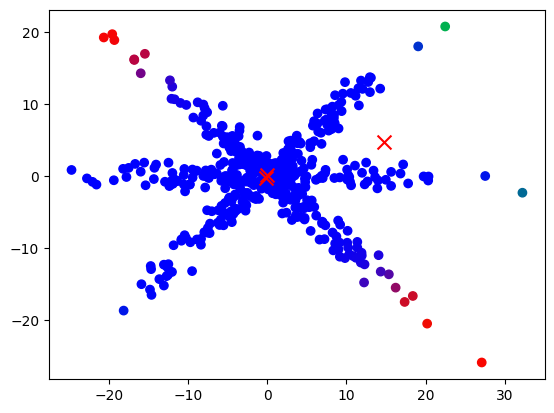

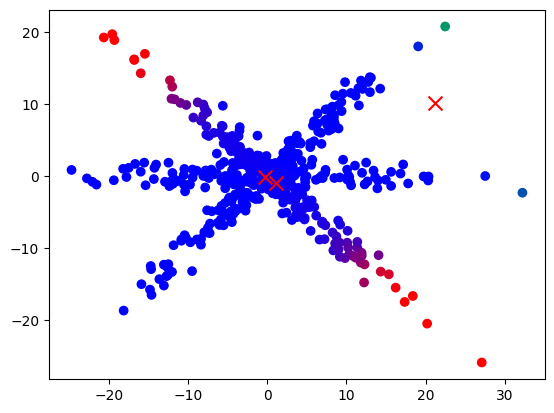

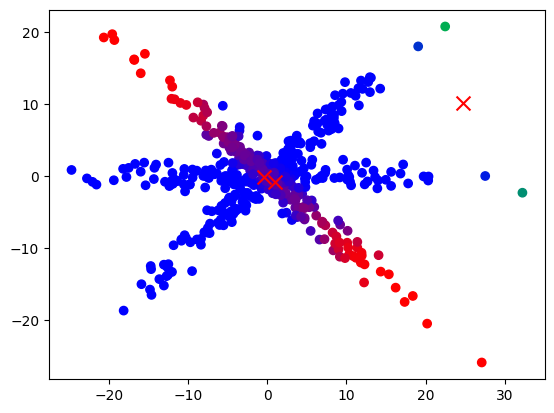

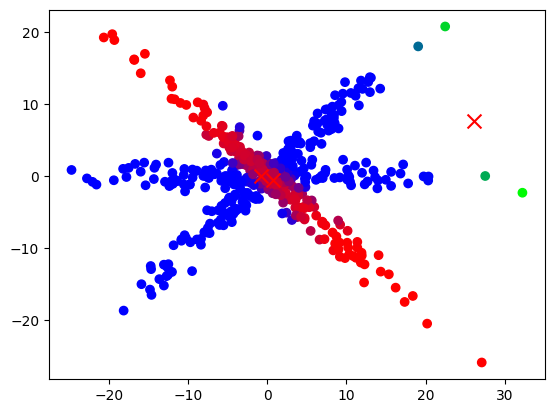

In [17]:
K = 3

# initializations

mus = torch.randn(K, 2)*0.1

Ws = torch.stack([torch.matmul(torch.diag(torch.tensor([1, 1])).float(), getrotmat(pi/20).transpose(0, 1)),

                      torch.matmul(torch.diag(torch.tensor([1, 1])).float(), getrotmat(-pi/20).transpose(0, 1)),

                      torch.matmul(torch.diag(torch.tensor([1, 1])).float(), getrotmat(torch.tensor([0.0])).transpose(0, 1))], dim=0)

pis = torch.ones(K) / K

eps = 1e-10

torch.manual_seed(8)



def gaussian_logpdf(X, mu, Sigma, k=200):

  # gaussian logpdf, use as is no need to touch

  eps = 1e-20

  S, U = torch.linalg.eig(Sigma)

  S, U = S.real, U.real

  Sigma_pinv = torch.matmul(torch.matmul(U[:, :k], torch.diag(1/(S[:k] + eps))), U[:, :k].transpose(0, 1))

  logpdf = - 0.5*(torch.matmul((X - mu.unsqueeze(0)), Sigma_pinv) * (X - mu.unsqueeze(0))).sum(-1)

  logpdf = logpdf - torch.log(S[:k] + eps).sum()

  return logpdf





for ep in range(15):



  # E step

  # find the responsibilities for each cluster

  resps_num = torch.zeros(N, K)

  for k in range(K):

    resps_num[:, k] = gaussian_logpdf(X,mu=mus[k],Sigma=Ws[k] ) + torch.log(pis[k] + eps)

  resps =  torch.exp(resps_num - torch.logsumexp(resps_num, 1, keepdim=True))

  # hint: (I am calling E[h_n] resps) / J'appelle E[h_n] resps

  # print(resps.shape)



  # M step



  # estimate mus

  mus = (X.unsqueeze(1) * resps.unsqueeze(-1)).sum(0) / resps.sum(0).unsqueeze(-1)

  #torch.matmul(resps.t(), X) * resps.sum(0).unsqueeze(-1)

  #mus = mus.mean(0)



  #print(mus)



  # estimate Ws

  zeromeans = (X.unsqueeze(1) - mus.unsqueeze(0))

  covhats = zeromeans.unsqueeze(-1) * zeromeans.unsqueeze(2)

  # print(covhats.shape)

  Ws = (covhats * resps.unsqueeze(-1).unsqueeze(-1)).sum(0) / resps.sum(0).unsqueeze(-1).unsqueeze(-1)

  # print(Ws)



  pis = resps.mean(0)

  plt.figure()

  print(resps.shape)

  plt.scatter(X[:, 0], X[:, 1], c=resps)
  plt.scatter(mus[:, 0], mus[:, 1], c='red', marker='x', s=100)

# Q3. Spectral Clustering



First of all, let's generate some quirky looking data using sklearn



# Q3. Regroupement spectral



Tout d'abord, générons des données quirky en utilisant sklearn


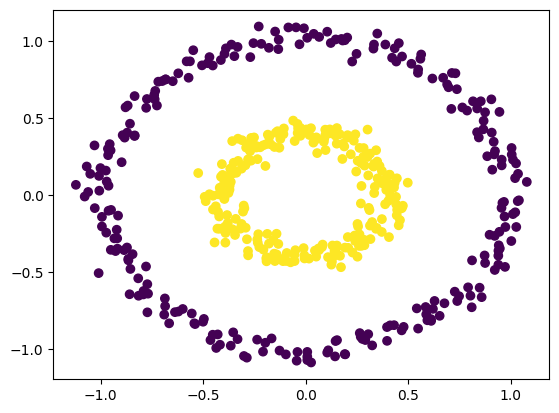

In [18]:
import sklearn.datasets as skd

import matplotlib.pyplot as plt



data, labels = skd.make_circles(n_samples=500, noise=0.05, factor=0.4)

data = torch.from_numpy(data)



plt.scatter(data[:,0], data[:, 1], c=labels)

## Implement Spectral Clustering (20pt)



Implement spectral clustering as we discussed it in the class.



First of all, calculate the distance matrix using an RBF Kernel such that

$A_{ij} = \exp \left ( - \gamma \| x_i - x_j \|_2^2 \right), \; i \neq j$.

$$A_{ij} =0, \; i = j$$.   



then compute the Graph Laplacian, such that



$ L:= D^{-1/2} A D^{-1/2}$, where

D is a diagonal matrix, and $D_{ii} = \sum_j A_{ij}$. As the last step, calculate the eigenvectors $L$, take the first $k$ of them, and run k-means clustering on these $k$ dimensional vectors.



(As described in slide 53.)



## Implémenter le clustering spectral (20 pt)



Implémentez le regroupement spectral comme nous en avons discuté en classe.



Tout d’abord, calculez la matrice de distance à l’aide d’un noyau RBF tel que

$$A_{ij} = \exp \left ( - \gamma \| x_i - x_j \|_2^2 \right), \; i \neq j$$.

$$A_{ij} =0, \; i = j$$.



puis calculez le Graphe Laplacien, tel que



$$ L:= D^{-1/2} A D^{-1/2}$$, où

D est une matrice diagonale, et $D_{ii} = \sum_j A_{ij}$. Comme dernière étape, calculez les vecteurs propres $L$, prenez le premier $k$ d'entre eux et exécutez le clustering k-means sur ces $k$ vecteurs dimensionnels.



(Comme décrit dans la diapositive 53.)




Initialization complete
Iteration 0, inertia 0.011339256927185935.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.011226035405467268.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.00970130689131315.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.007831105753402595.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.006873997299030128.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.009285080054686855.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.008687528782576316

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-1.2306455751091934,
 1.1893349072345065,
 -1.1955808032840944,
 1.2040118674923896)

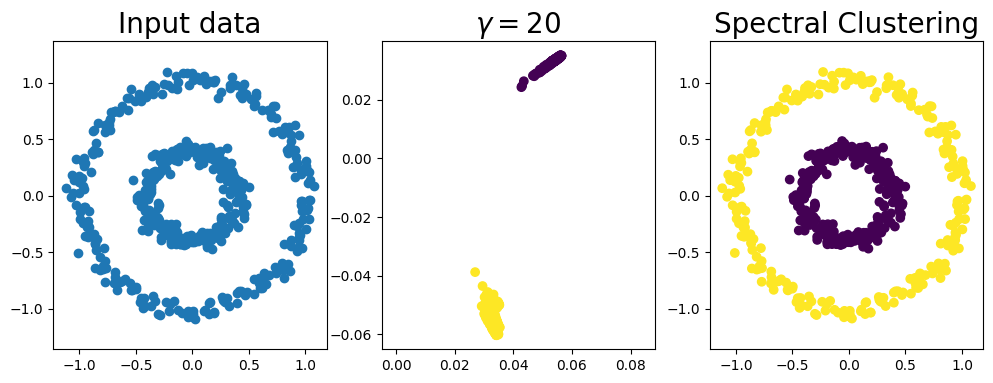

In [19]:
import sklearn.cluster as skc



gamma = 20



A = (1 - torch.eye(data.shape[0])) * torch.exp(-gamma *(data.unsqueeze(1) - data).pow(2).sum(-1))

Dm = (torch.diag(1/A.sum(-1))).sqrt()



L = torch.matmul(torch.matmul(Dm, A), Dm)



k = 2

U, V = torch.linalg.eig(L)

V = V[:,:k].real



_, labels_sc, _ = skc.k_means(V.numpy(), k, verbose=True)

fontsize = 20



fig = plt.figure(figsize=(12, 4))

plt.subplot(131)

plt.plot(data[:, 0], data[:, 1], 'o')

plt.title('Input data', fontsize=fontsize)

plt.axis('equal')



plt.subplot(132)

plt.scatter(V[:, 0], V[:, 1], c=labels_sc)

plt.title(f'$\gamma={gamma}$', fontsize=fontsize)

plt.axis('equal')



plt.subplot(133)

plt.scatter(data[:, 0], data[:, 1], c=labels_sc)

plt.title('Spectral Clustering', fontsize=fontsize)

plt.axis('equal')






## Bonus (20pt)



Repeat the question above, for different $\gamma$ values, comment on the effect.



Answer: ?@!#



## Bonus (20pts)



Répétez la question ci-dessus, pour différentes valeurs $\gamma$, commentez sur l'effet.



Réponse : @?$#

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.5213385353270767.
Iteration 1, inertia 0.3084949624413884.
Iteration 2, inertia 0.30740465016492513.
Iteration 3, inertia 0.30735737661891704.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.6694094744175461.
Iteration 1, inertia 0.3819254520415637.
Iteration 2, inertia 0.32312105446168954.
Iteration 3, inertia 0.31019606862733395.
Iteration 4, inertia 0.30777586862430717.
Iteration 5, inertia 0.30752668915188724.
Iteration 6, inertia 0.3074760222513299.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 0.3560280312842984.
Iteration 1, inertia 0.30735737661891704.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.5203998399109806.
Iteration 1, inertia 0.3391197597640812.
Iteration 2, inertia 0.31327904331935785.
Iteration 3, inertia 0.3082935095423238.
Iteration 4, inertia 0.30740465016492513.
Iteration 5, inerti

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.37788260397439155.
Iteration 1, inertia 0.28505941390924416.
Iteration 2, inertia 0.28056775142679247.
Iteration 3, inertia 0.27892766211369524.
Iteration 4, inertia 0.27866242423133303.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.3354203041919801.
Iteration 1, inertia 0.2799596982718271.
Iteration 2, inertia 0.2787813613165932.
Iteration 3, inertia 0.2786624242313331.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.45563859380362287.
Iteration 1, inertia 0.27868950567347855.
Iteration 2, inertia 0.2786624242313331.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.3678779199655149.
Iteration 1, inertia 0.2786624242313331.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.398827577418912.
Iteration 1, inertia 0.2799064425969835.
Iteration 2, inertia 0.27866242423

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.008555733691388843.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.011766916283236336.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.006777751441267816.
Iteration 1, inertia 0.006368760989611483.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.009667486273452914.
Iteration 1, inertia 0.006368760989611483.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.011770652311778082.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.009103608366272772.
Iteration 1, inertia 0.006368760989611482.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.00736362183934856

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.008135352793181165.
Iteration 1, inertia 0.0058719448604721974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.007396383270180393.
Iteration 1, inertia 0.0058719448604721974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.007305404385680992.
Iteration 1, inertia 0.0058719448604721974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.007917162862287087.
Iteration 1, inertia 0.0058719448604721974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.006599758323776861.
Iteration 1, inertia 0.0058719448604721974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.009139084848535069.
Iteration 1, inertia 0.0058719448604721974.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.00836301247

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.012590329164399092.
Iteration 1, inertia 0.008687005846081472.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.008874162861559728.
Iteration 1, inertia 0.008687005846081472.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.010568568040067575.
Iteration 1, inertia 0.008687005846081472.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.017925220963709527.
Iteration 1, inertia 0.008687005846081472.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.011063439496326289.
Iteration 1, inertia 0.008687005846081472.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.013052452641016538.
Iteration 1, inertia 0.008687005846081472.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.00923410541117585

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.016878803344050036.
Iteration 1, inertia 0.011951671043183069.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.01466065212896741.
Iteration 1, inertia 0.011951671043183069.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.026981295714236533.
Iteration 1, inertia 0.011951671043183069.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.0159104409232853.
Iteration 1, inertia 0.011951671043183069.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.012229301585762594.
Iteration 1, inertia 0.011951671043183069.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.014704234730377654.
Iteration 1, inertia 0.011951671043183069.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.015873748426568884.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 0.023899343510457895.
Iteration 1, inertia 0.015449953639832899.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.015542624787290831.
Iteration 1, inertia 0.015449953639832897.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.015895125049377363.
Iteration 1, inertia 0.015449953639832899.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.023215103974393355.
Iteration 1, inertia 0.015449953639832899.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.016435789464300507.
Iteration 1, inertia 0.015449953639832899.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.01852912413642196.
Iteration 1, inertia 0.015449953639832897.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.06098894042054652.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1.5559741037647679.
Iteration 1, inertia 1.4204525727585546.
Iteration 2, inertia 1.408684882961089.
Iteration 3, inertia 1.407179359631495.
Iteration 4, inertia 1.4068609760227977.
Iteration 5, inertia 1.4065497806266145.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2.89198139046517.
Iteration 1, inertia 1.4408632385191127.
Iteration 2, inertia 1.4372022701008347.
Iteration 3, inertia 1.4370250192855543.
Iteration 4, inertia 1.4367426843099809.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3.397540171401359.
Iteration 1, inertia 1.4197395878531274.
Iteration 2, inertia 1.409219102021521.
Iteration 3, inertia 1.4074299317658157.
Iteration 4, inertia 1.4071793596314948.
Iteration 5, inertia 1.4068609760227977.
Iteration 6, inertia 1.4065497806266145.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1.54877980279

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2.9501491023240987.
Iteration 1, inertia 1.4411054222830186.
Iteration 2, inertia 1.418011586989151.
Iteration 3, inertia 1.4102184818176196.
Iteration 4, inertia 1.408964338037502.
Iteration 5, inertia 1.4088592258440882.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2.8574548445258428.
Iteration 1, inertia 1.4324846616465905.
Iteration 2, inertia 1.4220822566078763.
Iteration 3, inertia 1.4121812858308158.
Iteration 4, inertia 1.4088263815339725.
Iteration 5, inertia 1.4072733765807521.
Iteration 6, inertia 1.4067155666152222.
Iteration 7, inertia 1.4066220573031536.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 4.638206039232152.
Iteration 1, inertia 1.4724128784608026.
Iteration 2, inertia 1.4604062922963956.
Iteration 3, inertia 1.4595229536284315.
Iteration 4, inertia 1.4581962146885958.
Iteration 5, inertia 1.4563786337419888.
Iteration 6, inerti

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1.6789055265760915.
Iteration 1, inertia 1.632972792445358.
Iteration 2, inertia 1.621170684432062.
Iteration 3, inertia 1.6164011409400159.
Iteration 4, inertia 1.614163463021507.
Iteration 5, inertia 1.612930549333445.
Iteration 6, inertia 1.6128609382755061.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1.5977146328357605.
Iteration 1, inertia 1.5274312497232168.
Iteration 2, inertia 1.526975104660764.
Iteration 3, inertia 1.5268532114420719.
Iteration 4, inertia 1.5267561452394123.
Iteration 5, inertia 1.5265184295249719.
Iteration 6, inertia 1.5261327114146312.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1.6970334894405084.
Iteration 1, inertia 1.674921824432106.
Iteration 2, inertia 1.6307424071631578.
Iteration 3, inertia 1.6281994231496466.
Iteration 4, inertia 1.6270767256305039.
Iteration 5, inertia 1.6262516723411757.
Iteration 6, inertia 1

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1.5861252892102167.
Iteration 1, inertia 1.4628230077868265.
Iteration 2, inertia 1.4564456137276114.
Iteration 3, inertia 1.454800250514783.
Iteration 4, inertia 1.4533755204623784.
Iteration 5, inertia 1.4527581194458996.
Iteration 6, inertia 1.4520703733052278.
Iteration 7, inertia 1.4519817941110769.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1.6029321350885664.
Iteration 1, inertia 1.46140922519362.
Iteration 2, inertia 1.4549890522339206.
Iteration 3, inertia 1.453817869609282.
Iteration 4, inertia 1.4530561762965677.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1.569924777718772.
Iteration 1, inertia 1.4293674404828043.
Iteration 2, inertia 1.416387633548726.
Iteration 3, inertia 1.4153928161759306.
Iteration 4, inertia 1.4153201554482202.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2.89290853620

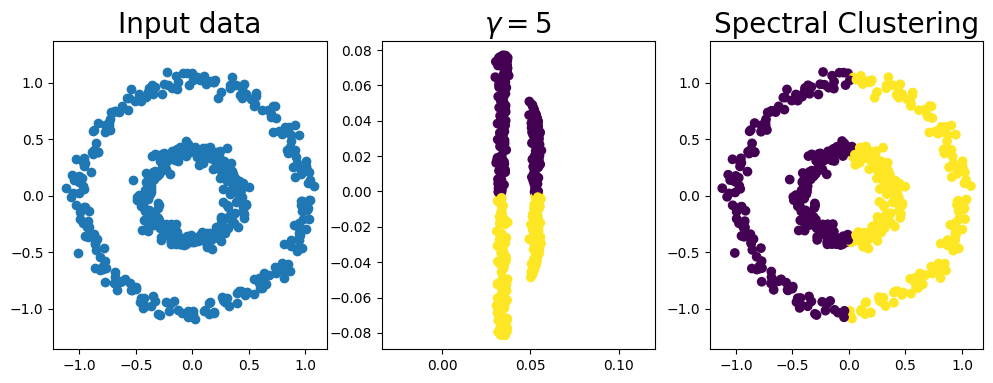

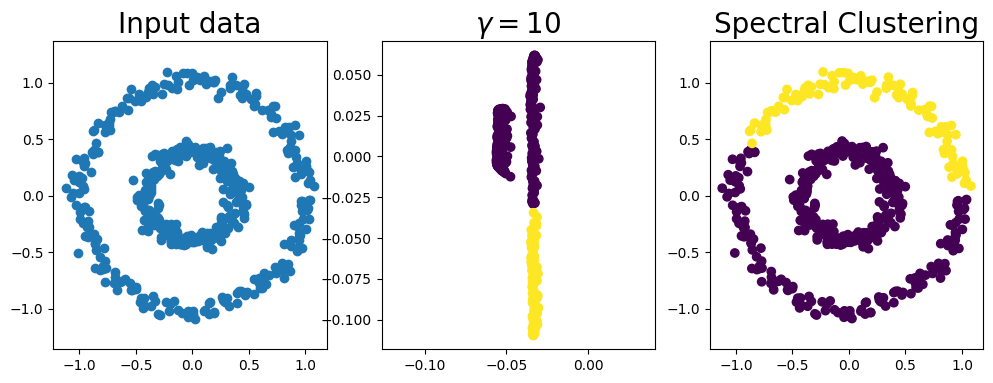

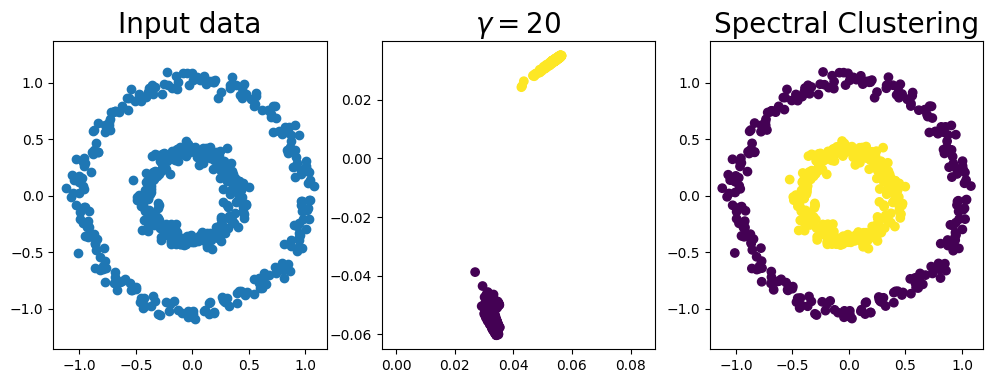

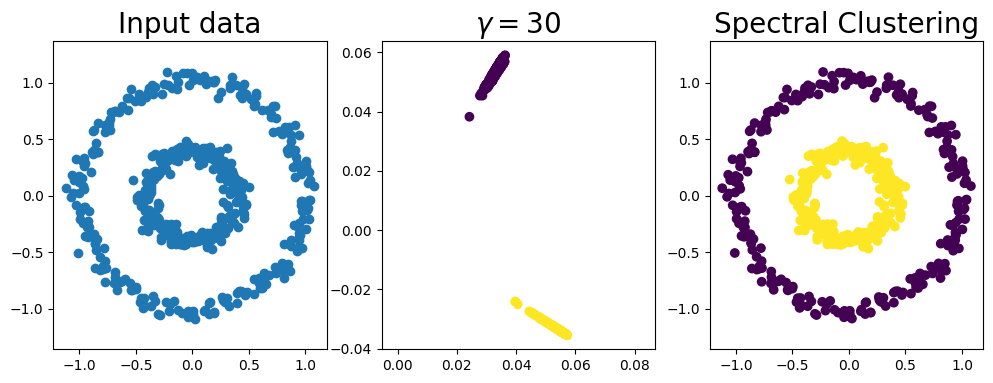

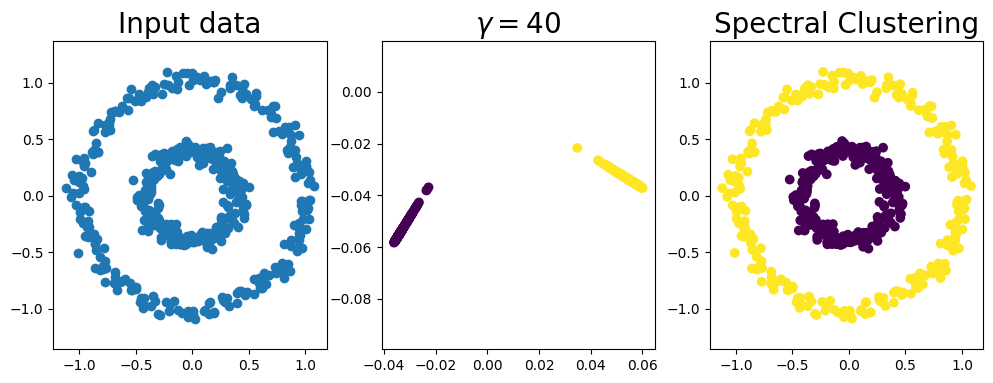

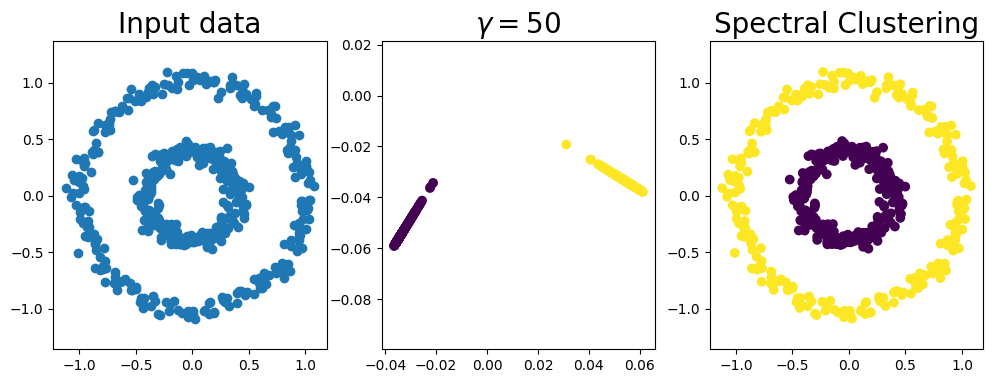

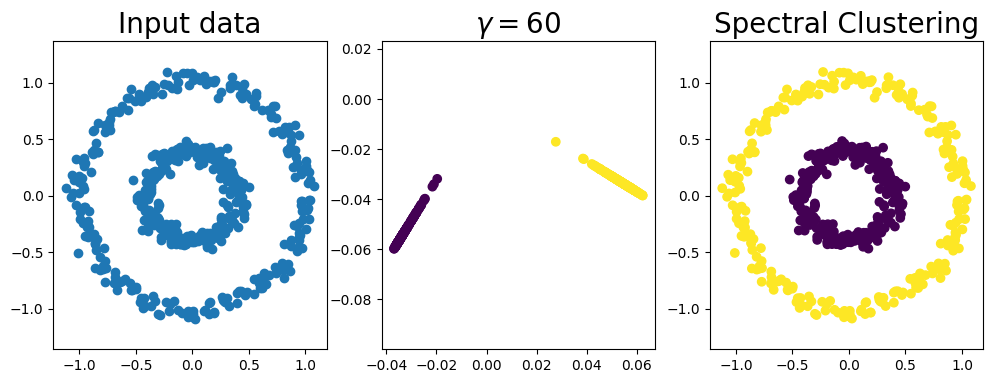

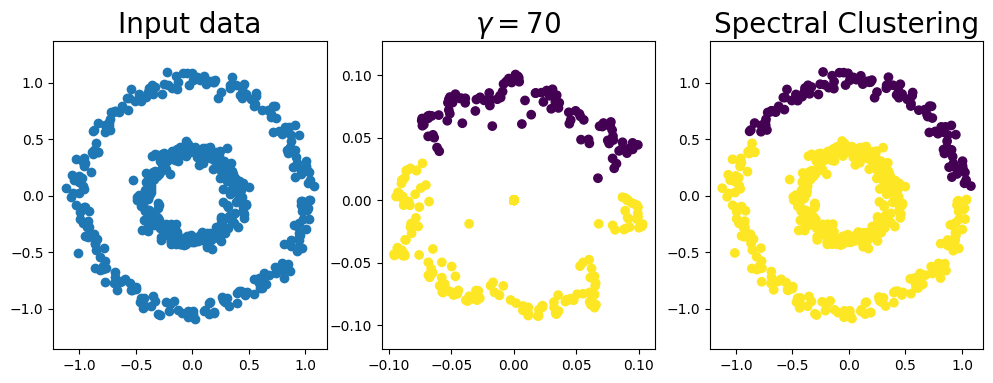

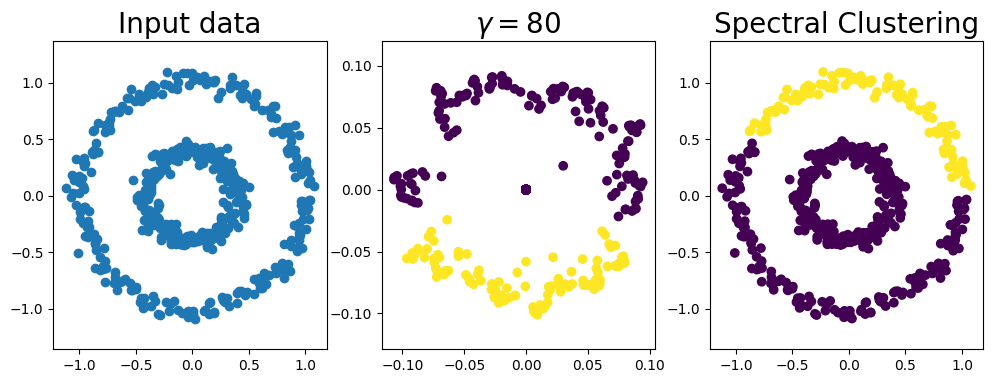

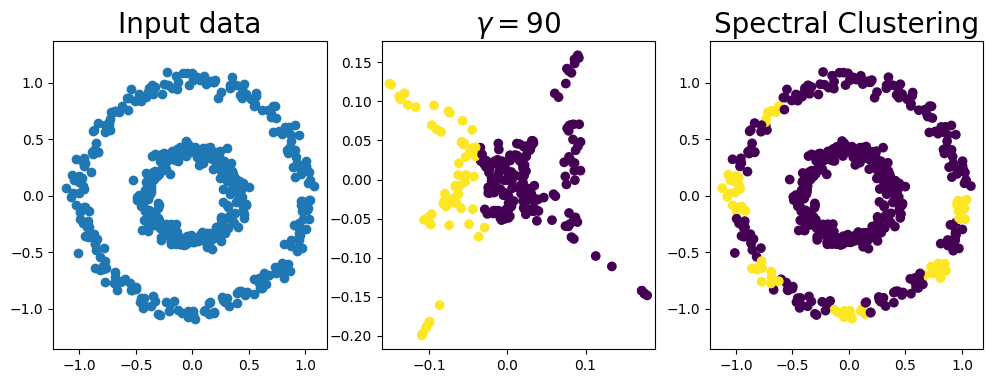

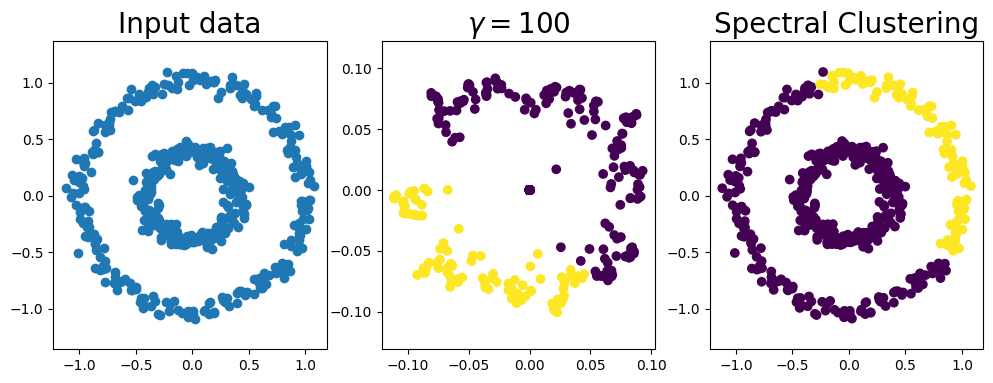

In [20]:
gammas = [5,10,20,30,40,50,60,70,80,90,100]



for g in gammas :

    A = (1 - torch.eye(data.shape[0])) * torch.exp(-g *(data.unsqueeze(1) - data).pow(2).sum(-1))

    Dm = (torch.diag(1/A.sum(-1))).sqrt()



    L = torch.matmul(torch.matmul(Dm, A), Dm)



    k = 2

    U, V = torch.linalg.eig(L)

    V = V[:,:k].real



    _, labels_sc, _ = skc.k_means(V.numpy(), k, verbose=True)

    fontsize = 20

    fig = plt.figure(figsize=(12, 4))

    plt.subplot(131)

    plt.plot(data[:, 0], data[:, 1], 'o')

    plt.title('Input data', fontsize=fontsize)

    plt.axis('equal')



    plt.subplot(132)

    plt.scatter(V[:, 0], V[:, 1], c=labels_sc)

    plt.title(f'$\gamma={g}$', fontsize=fontsize)

    plt.axis('equal')



    plt.subplot(133)

    plt.scatter(data[:, 0], data[:, 1], c=labels_sc)

    plt.title('Spectral Clustering', fontsize=fontsize)

    plt.axis('equal')

- Petits $\gamma$ (e.g., 5, 10) : La séparation est correcte, mais des erreurs mineures peuvent apparaître. Cela montre que le clustering spectral est efficace même avec des valeurs gamma basses.

- Valeurs intermédiaires de $\gamma$ (20 à 60) : Les cercles sont clairement séparés, illustrant la capacité optimale de la méthode pour ces valeurs.

- Grand $\gamma$ (≥ 70) : On observe une dégradation. La méthode commence à mal séparer les points ou produit des résultats bruités.

Interprétation : Un $\gamma$ trop faible ou trop élevé affecte négativement la qualité du clustering spectral. Les résultats montrent qu'il existe une plage de $\gamma$ optimale pour ce jeu de données particulier. En somme,  l'ajustement de $\gamma$ est crucial dans le clustering spectral pour obtenir des résultats optimaux.